<a href="https://colab.research.google.com/github/DivyaSharma0795/interpretable_ML_01/blob/main/Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #01
### Description
### Divya Sharma

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://colab.research.google.com/github/yourGHName/yourREPOName/blob/yourBranchName/yourFileName.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/156md6_ROBkfRjyINhjMWQM1hVKhQu22E?usp=sharing)

👉 Make sure to delete the helper markdown below in your own notebook!

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Duke-AI-XAI" # Change to your repo name
git_path = 'https://github.com/AIPI-590-XAI/Duke-AI-XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke-AI-XAI'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 77 (delta 28), reused 53 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 6.61 MiB | 6.99 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/Duke-AI-XAI/templates
template.ipynb


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 75.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [ ]:
# Importing required libraries for reading data and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5054,6094-ZIVKX,Female,0,No,No,68,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,Yes,Credit card (automatic),54.45,3674.95,No
3199,3696-DFHHB,Female,0,No,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.50,1821.8,No
3918,6319-IEJWJ,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.20,1776.55,Yes
6991,3585-ISXZP,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),95.65,778.1,Yes
1363,3084-DOWLE,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),92.00,6474.4,No


In [ ]:
print("Basic information about the dataset:")
print(data.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

In [ ]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print("Summary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


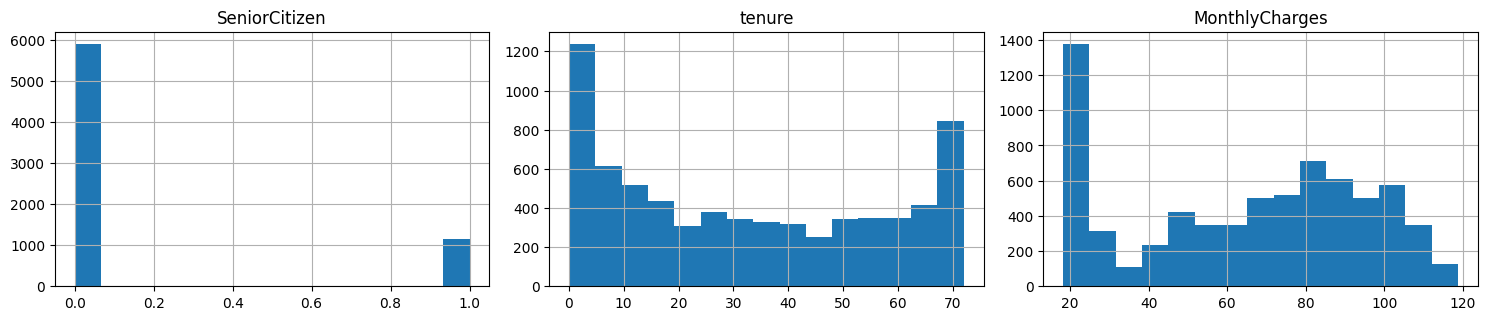

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()


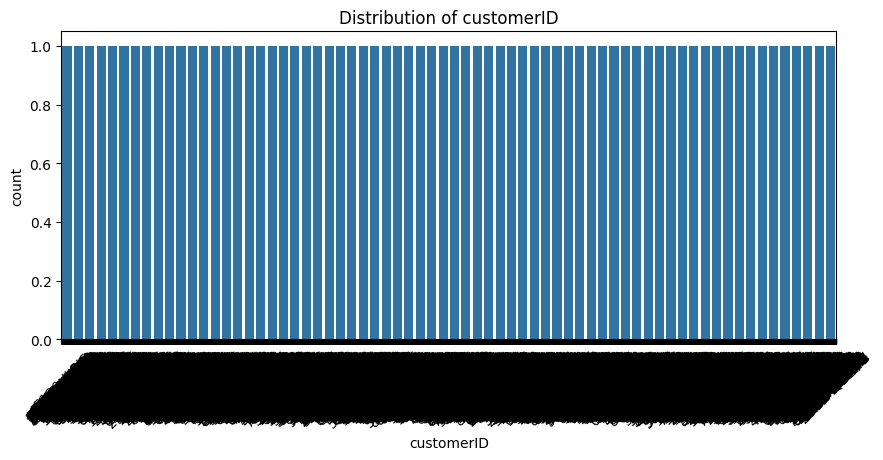

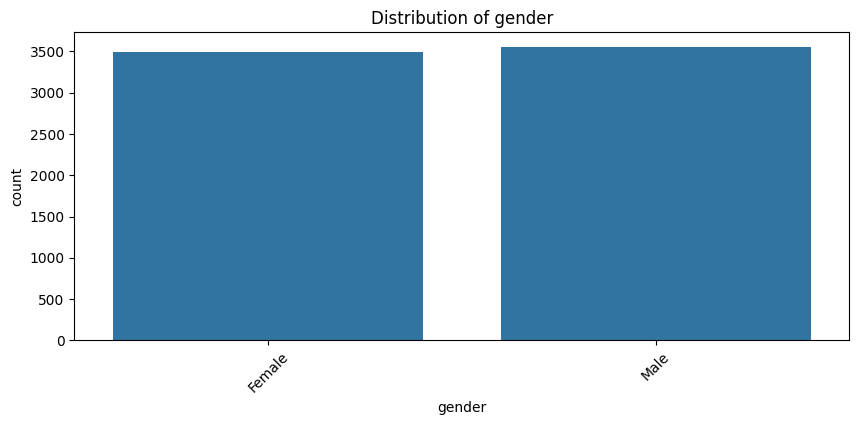

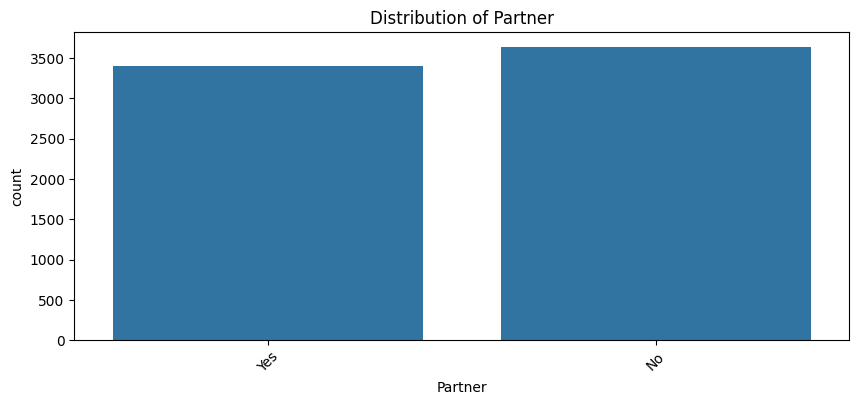

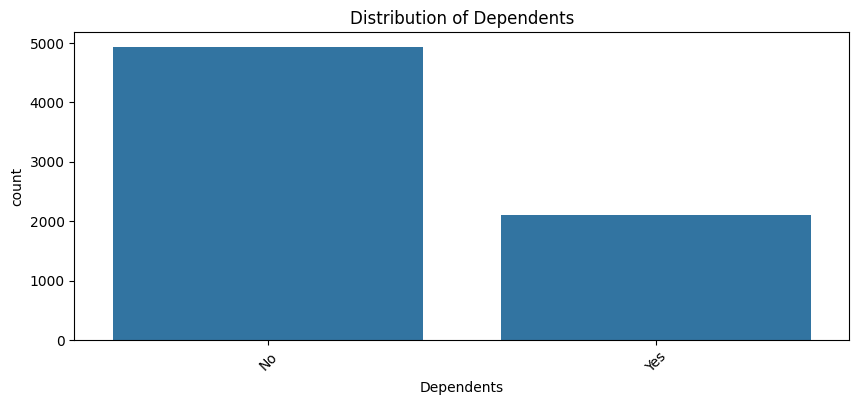

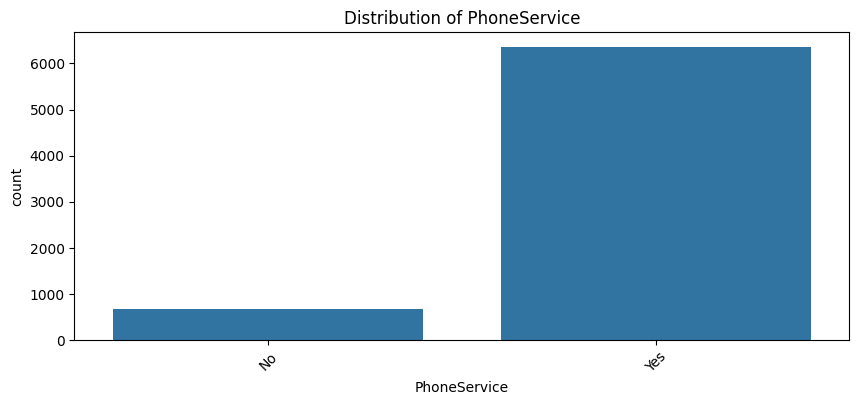

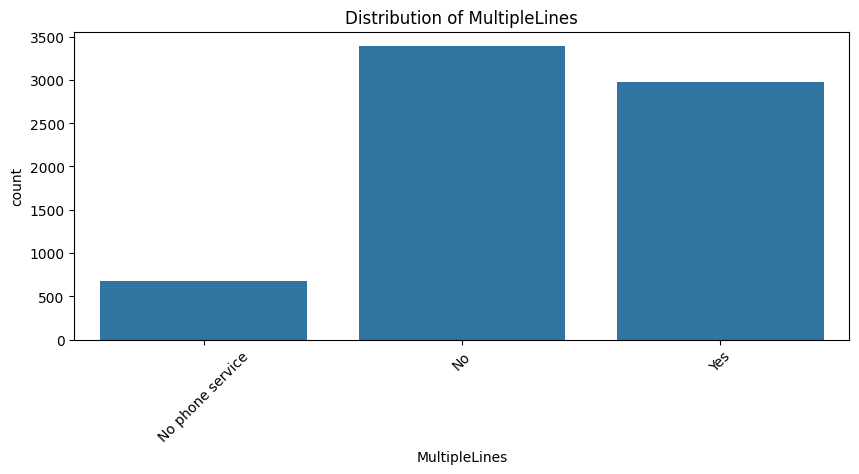

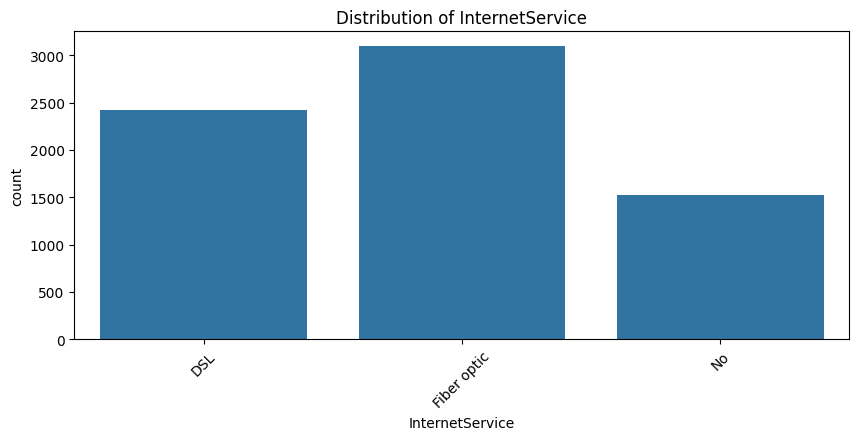

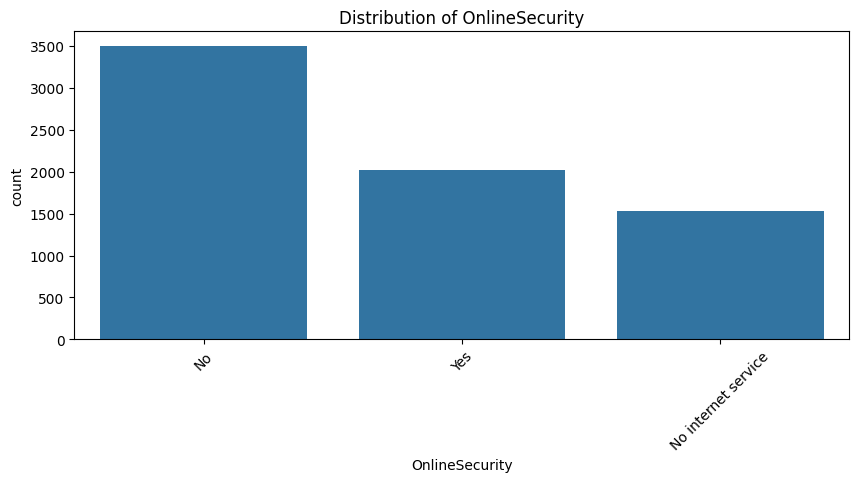

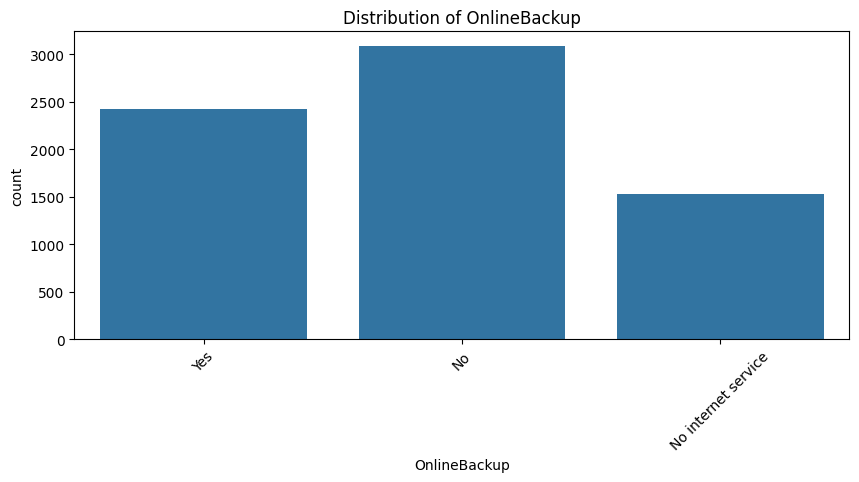

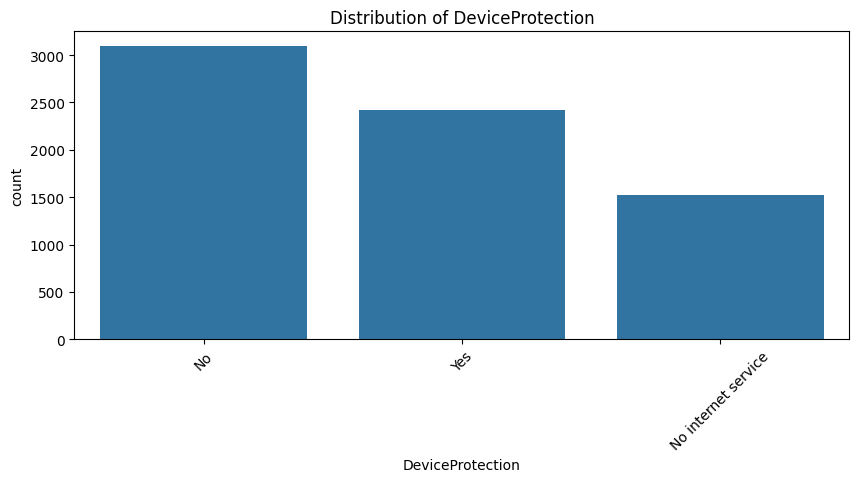

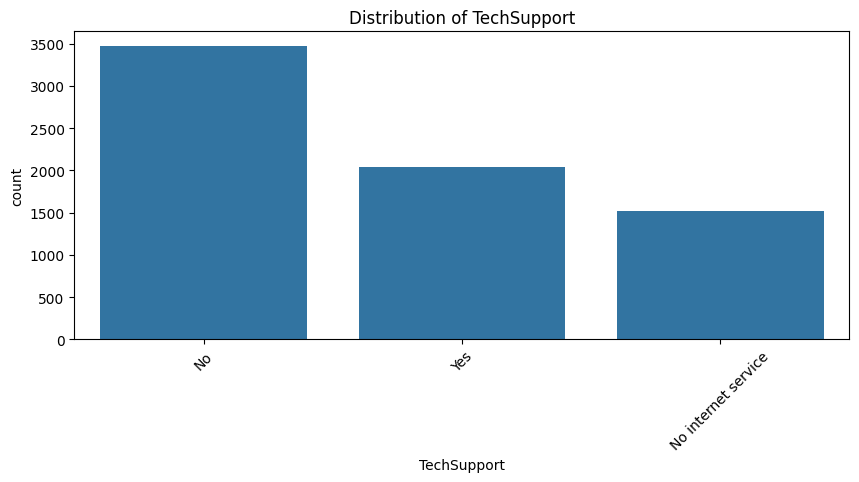

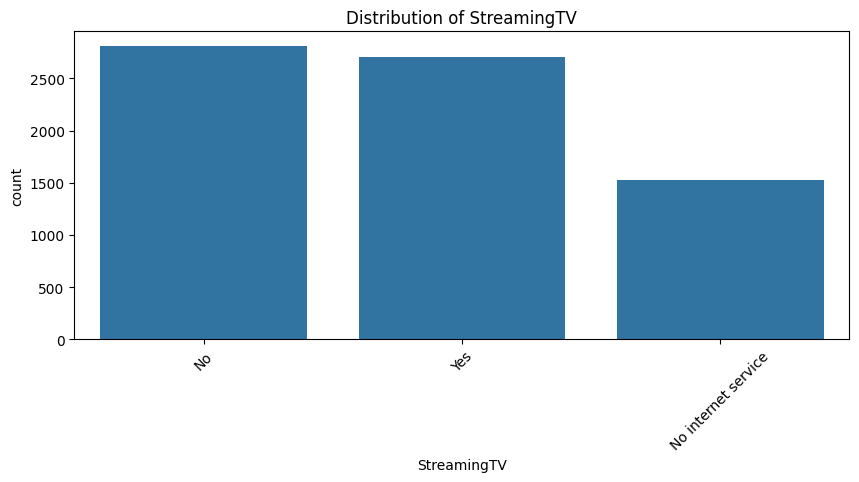

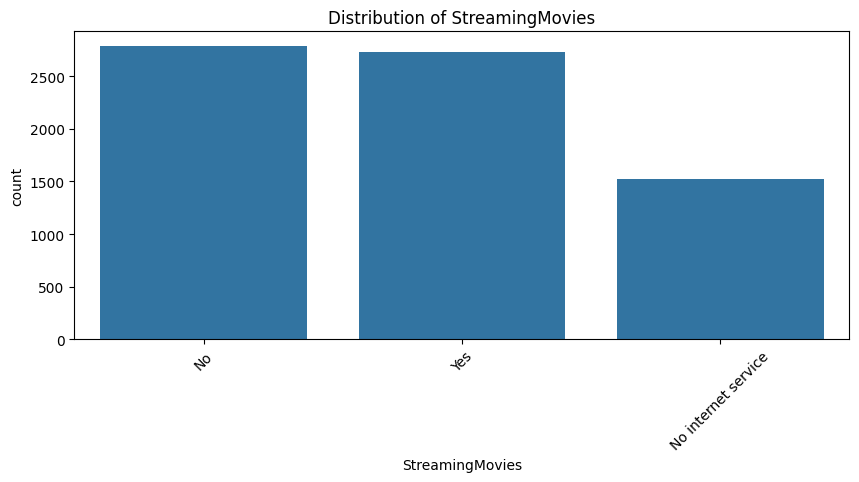

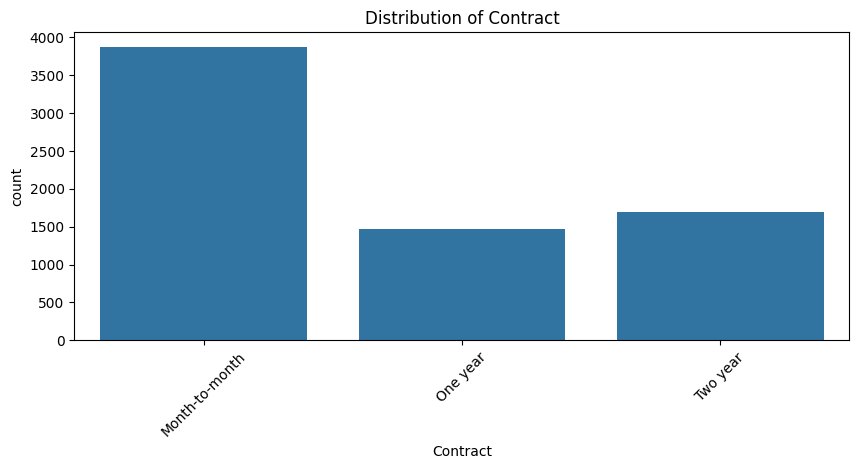

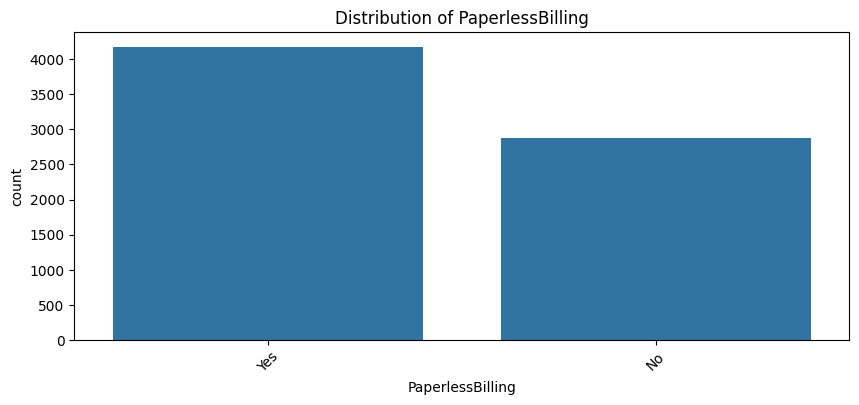

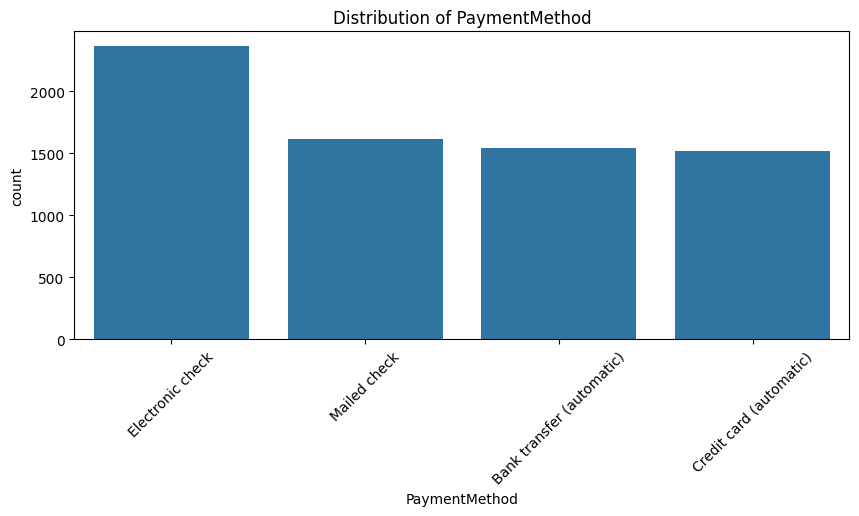

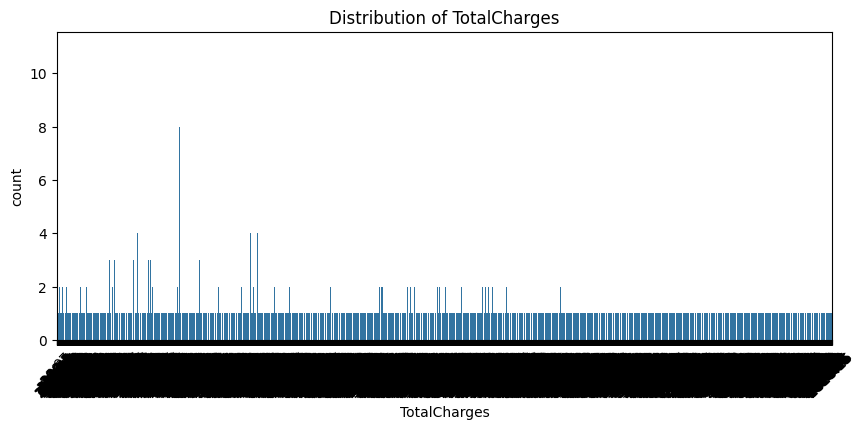

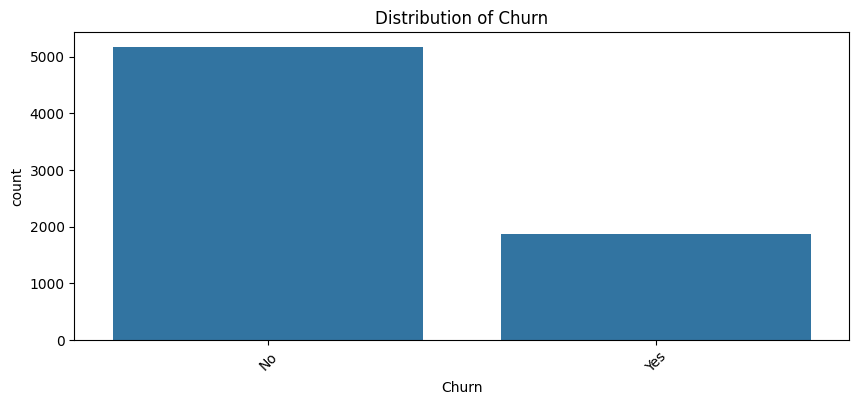

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

## Linear Regression

Coefficients of the linear regression model:
                       Coefficient
SeniorCitizen             0.040615
tenure                   -0.004179
MonthlyCharges           -0.004105
customerID_0003-MKNFE    -0.203258
customerID_0004-TLHLJ     0.296047
...                            ...
TotalCharges_997.75       0.000000
TotalCharges_998.1        0.057347
TotalCharges_999.45       0.234827
TotalCharges_999.8       -0.244961
TotalCharges_999.9       -0.247903

[13601 rows x 1 columns]

Mean Squared Error: 0.13900717438364465
R-squared: 0.285848069582079


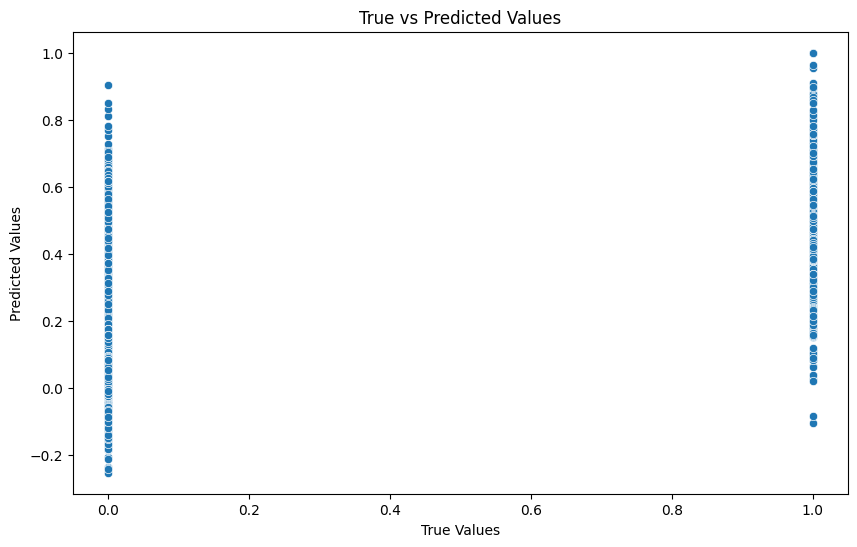

In [ ]:
# Importing libraries for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess the data
# Convert the 'Churn' column to numerical (0 for staying, 1 for churning)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split the data into training and testing sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Interpret the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients of the linear regression model:")
print(coefficients)

# Assess the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

## Logistic Regression

Coefficients of the logistic regression model:
                       Coefficient
SeniorCitizen             0.171866
tenure                   -0.033942
MonthlyCharges           -0.004796
customerID_0003-MKNFE    -0.271566
customerID_0004-TLHLJ     0.247403
...                            ...
TotalCharges_997.75       0.000000
TotalCharges_998.1       -0.011904
TotalCharges_999.45       0.282191
TotalCharges_999.8       -0.373329
TotalCharges_999.9       -0.393611

[13601 rows x 1 columns]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409


Confusion Matrix:
[[941  95]
 [151 222]]

ROC AUC Score: 0.8612898133675615


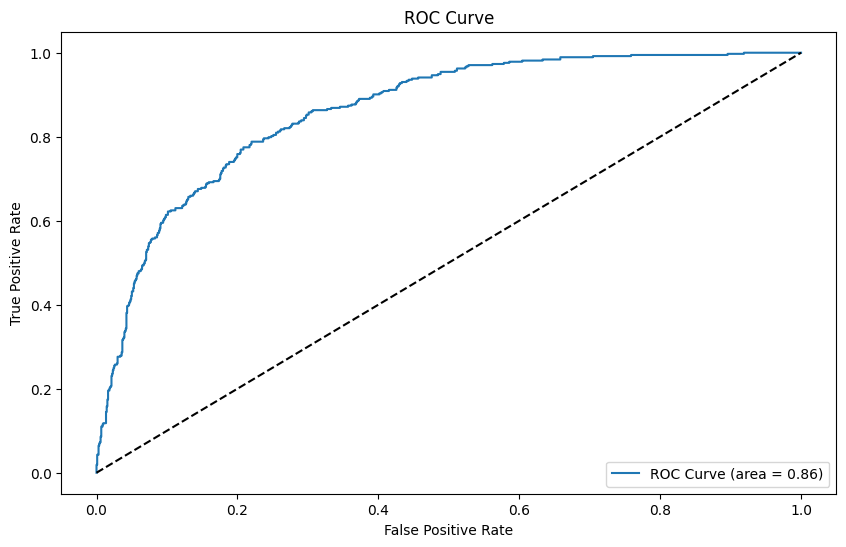

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

data = pd.read_csv(path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert the 'Churn' column to numerical (0 for staying, 1 for churning)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split the data into training and testing sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Interpret the coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print("Coefficients of the logistic regression model:")
print(coefficients)

# Assess the model's performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC AUC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## GAM

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     56.1737
Link Function:                        LogitLink Log Likelihood:                                 -2276.6879
Number of Samples:                         5634 AIC:                                             4665.7232
                                                AICc:                                            4666.9162
                                                UBRE:                                               2.8361
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3018
Feature Function                  Lam

<ipython-input-37-84bc7cc87d57>:50: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


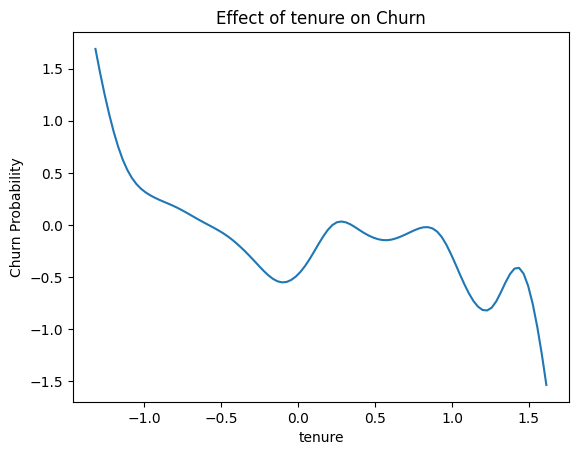

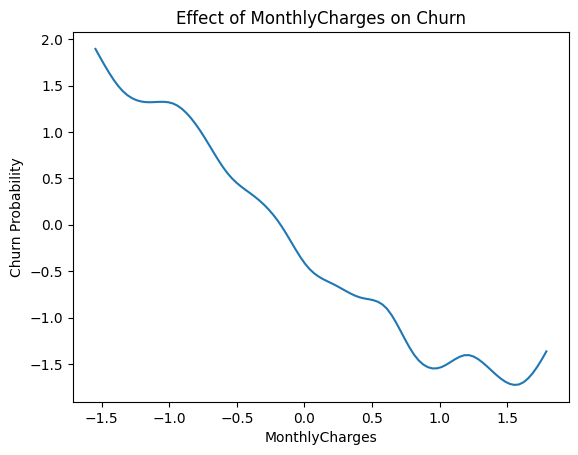

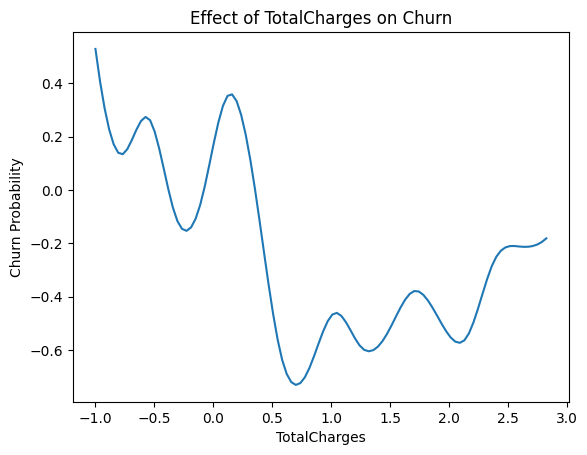

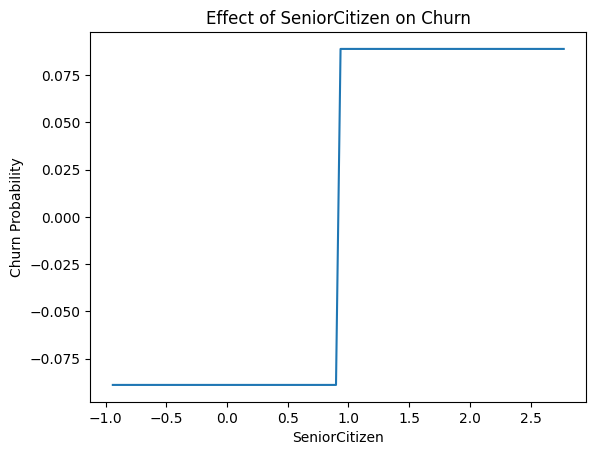

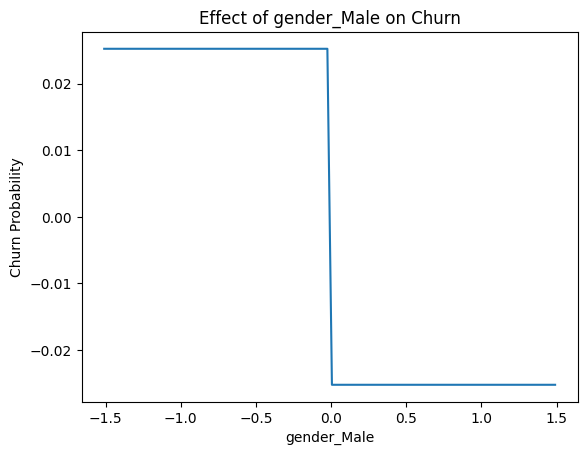

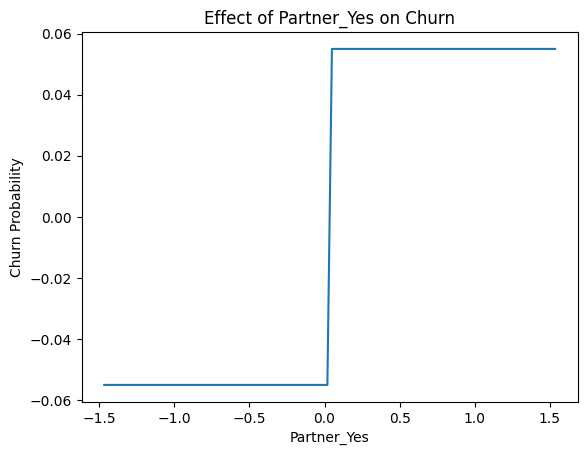

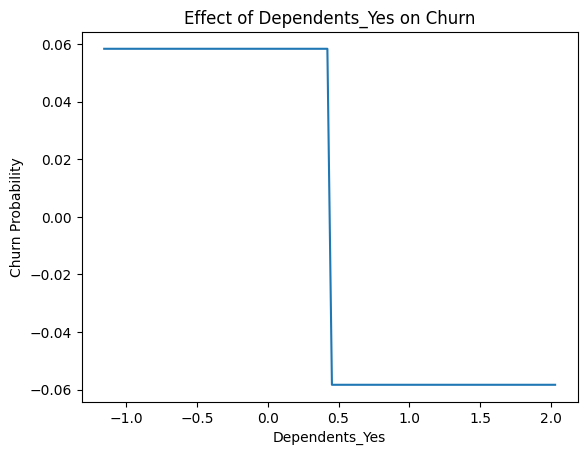

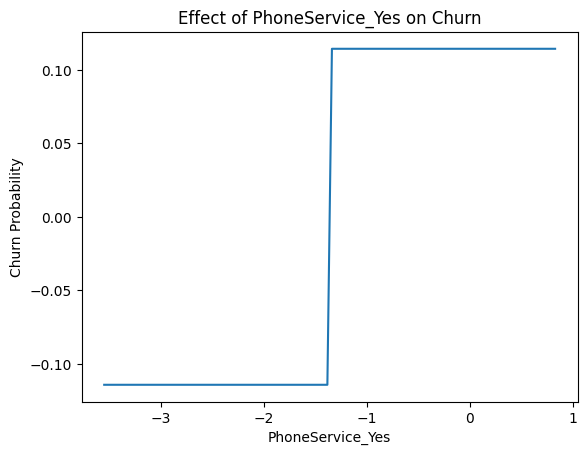

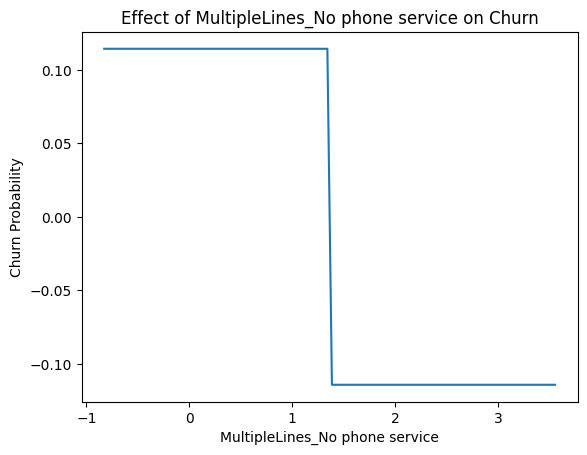

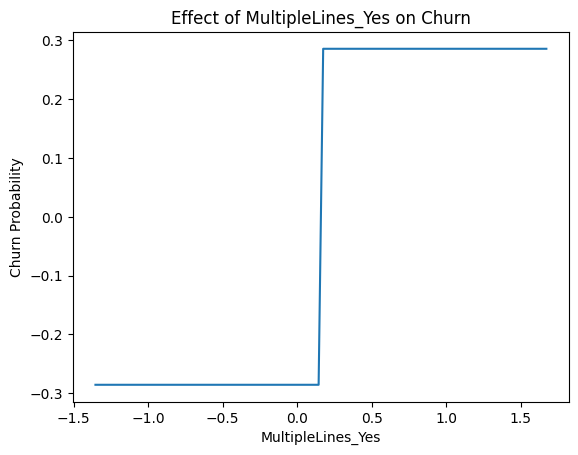

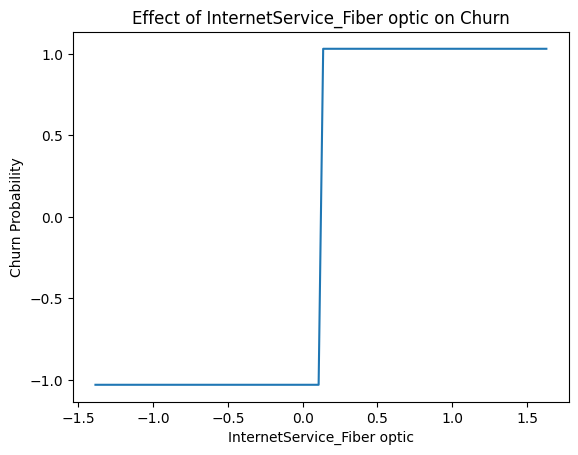

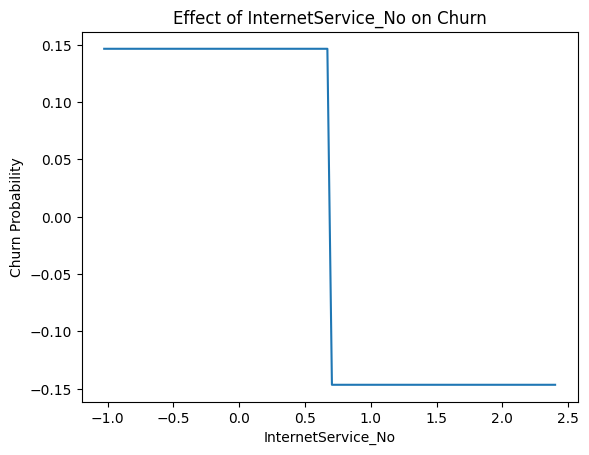

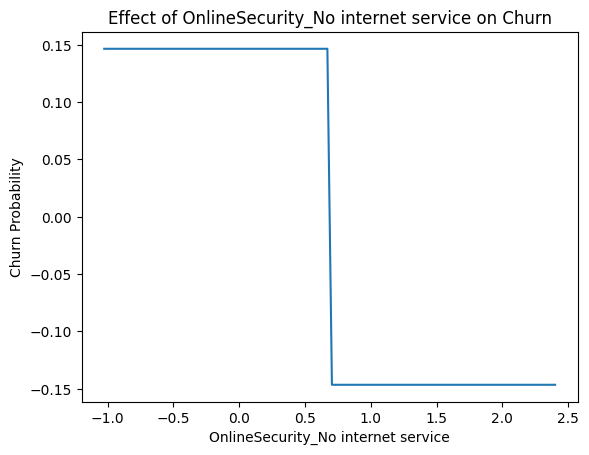

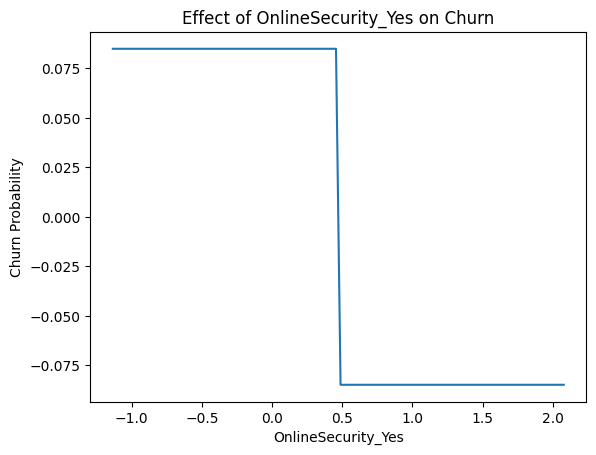

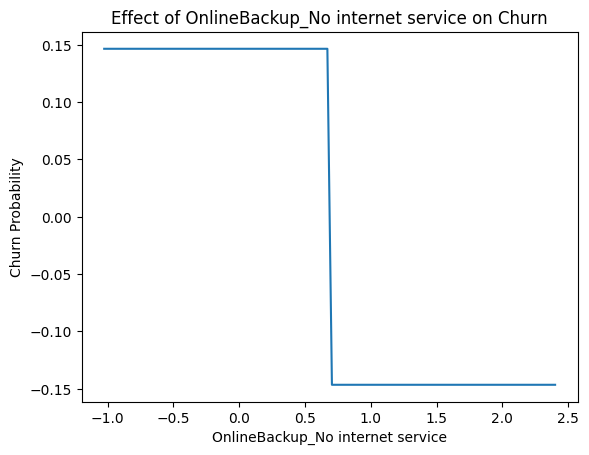

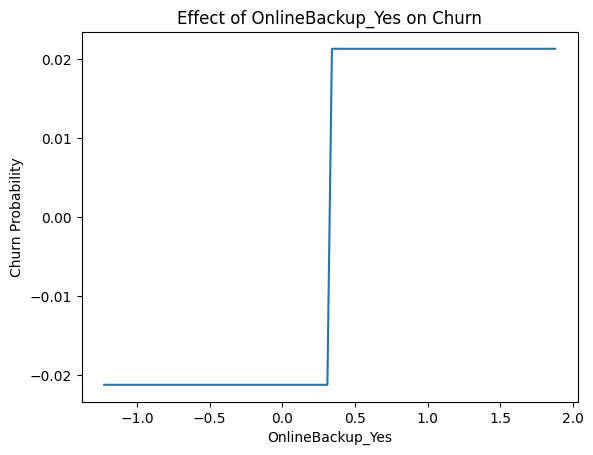

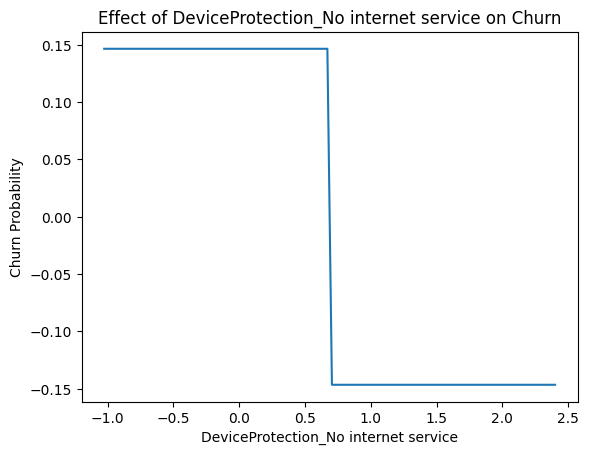

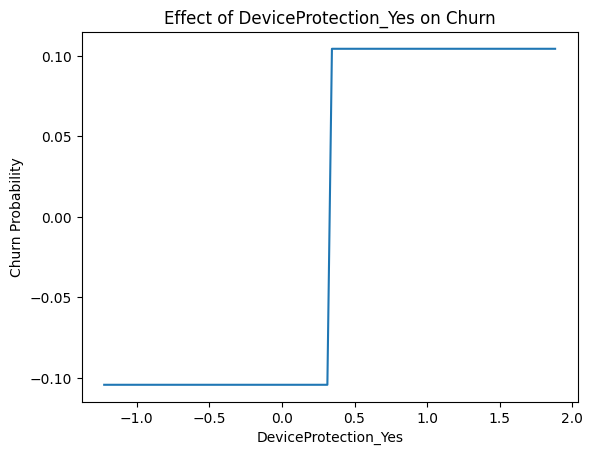

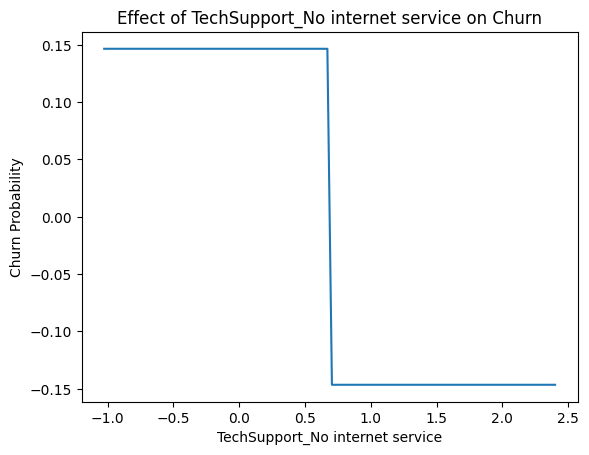

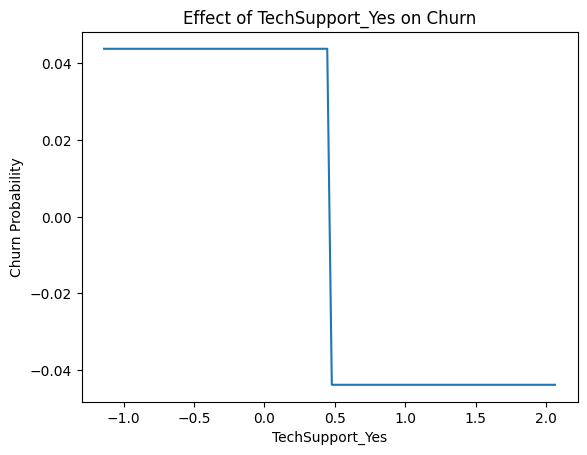

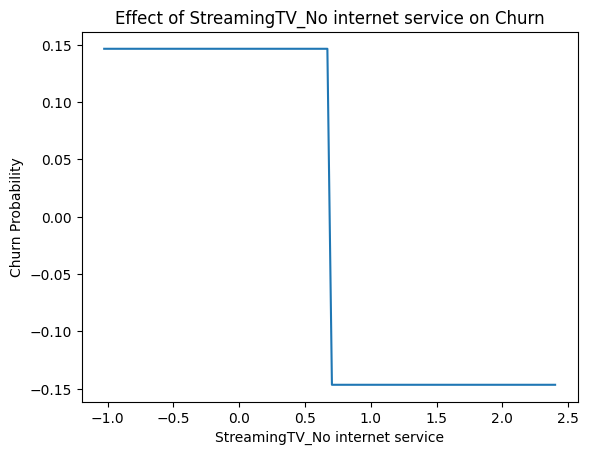

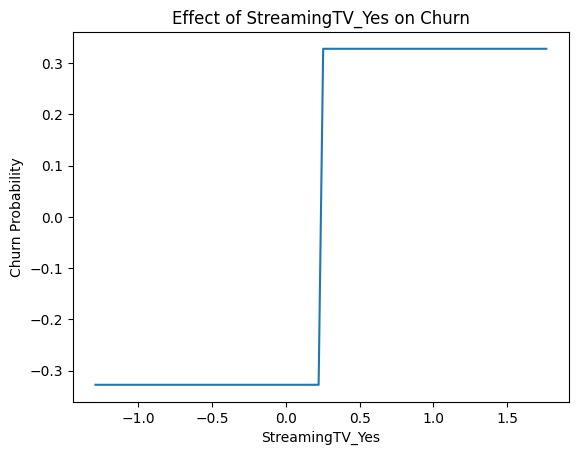

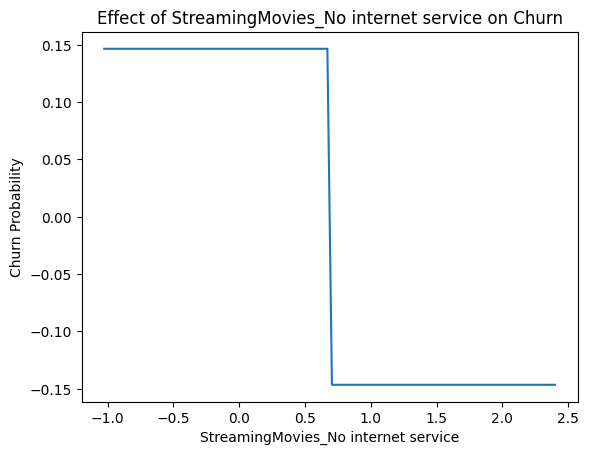

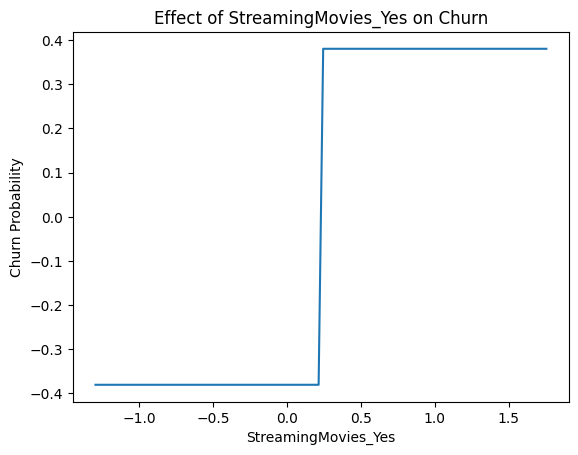

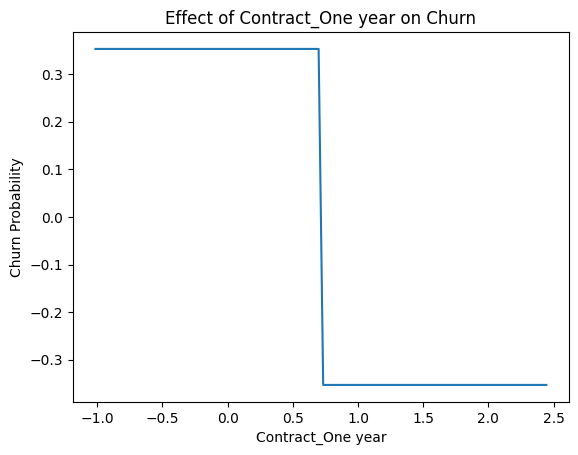

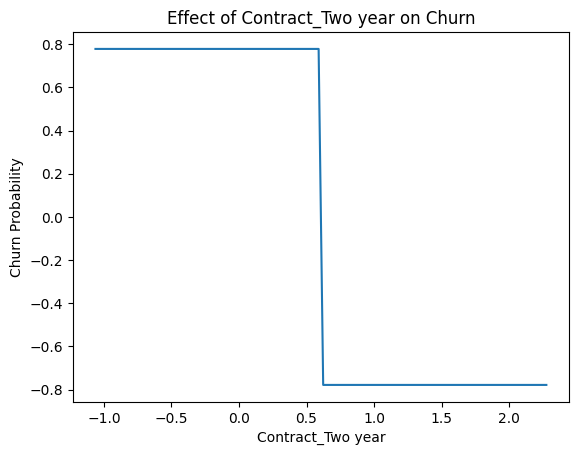

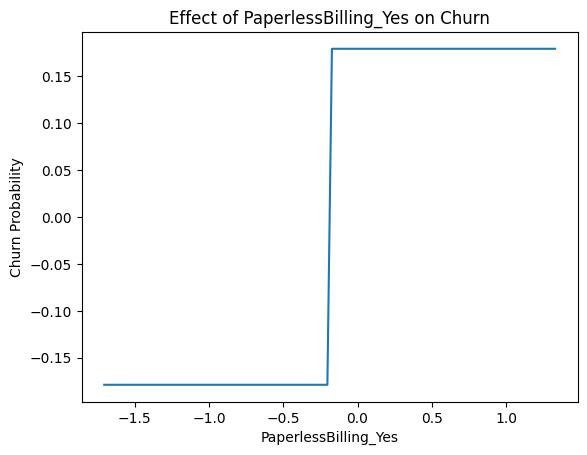

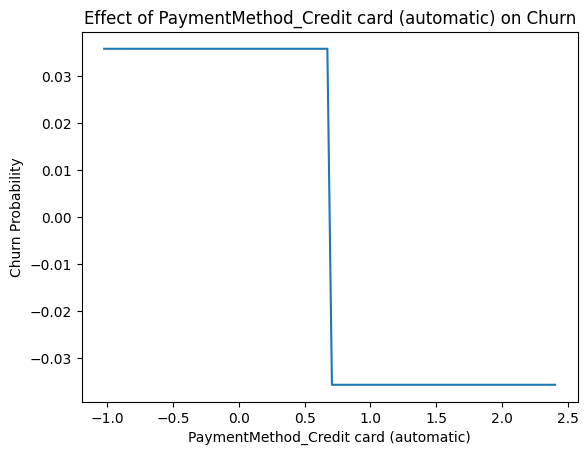

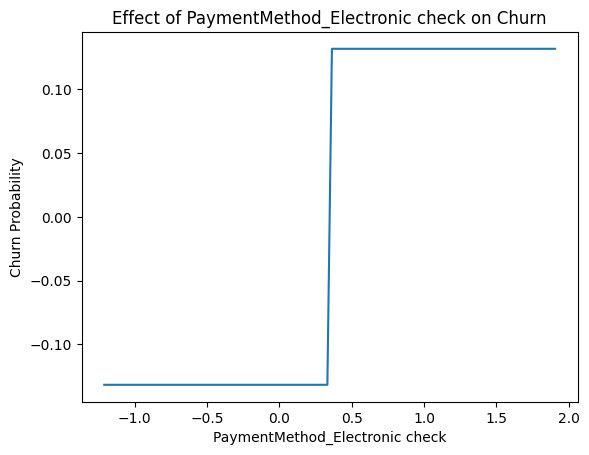

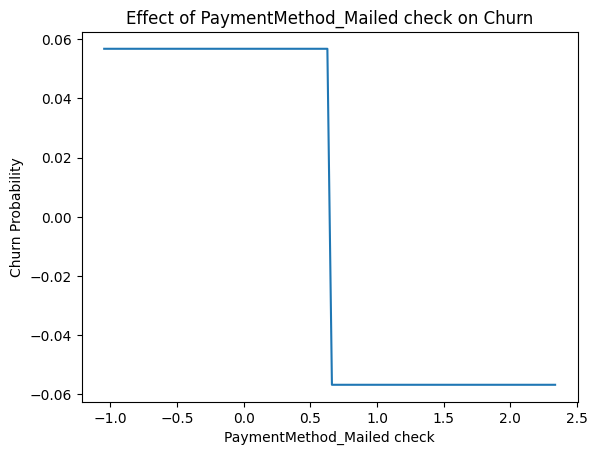

In [ ]:
!pip install pygam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from pygam import LogisticGAM, s, f

# Load the dataset
data = pd.read_csv(path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna({'TotalCharges': data['TotalCharges'].median()}, inplace=True)

# Drop customerID as it's not useful for modeling
data.drop(columns=['customerID'], inplace=True)

# Encode categorical variables using one-hot encoding
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

data[categorical_cols] = data[categorical_cols].astype(str)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded features with numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
X = pd.concat([data[numerical_cols], encoded_cat_df], axis=1)

# Target variable encoding (Churn: Yes = 1, No = 0)
y = data['Churn'].map({'Yes': 1, 'No': 0})

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define GAM with splines for numerical features and factor for categorical
terms = s(0) + s(1) + s(2) + f(3)
for i in range(4, X.shape[1]):
    terms += f(i)



# Train the model
gam = LogisticGAM(terms).fit(X_train, y_train)

# Model summary
print(gam.summary())

# Evaluate the model on test data
y_pred_probs = gam.predict_proba(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Performance evaluation
from sklearn.metrics import accuracy_score, roc_auc_score

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred_probs):.4f}')

# Plot partial dependence for selected features
for i, feature in enumerate(X.columns):
    plt.figure()
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Effect of {feature} on Churn')
    plt.xlabel(feature)
    plt.ylabel('Churn Probability')
    plt.show()


## Model Comparison